# Main Report with datasets 1 - 3. 

### Only dataset 1 has a complete set of results. Model Training and evaluation of dataset 3 were not able to be completed at the time of submission.

## Data Processing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'Assignment_1_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  object 
 1   age                         36489 non-null  float64
 2   heart_rate_min              36417 non-null  float64
 3   heart_rate_max              36417 non-null  float64
 4   heart_rate_mean             36417 non-null  float64
 5   mbp_min                     36401 non-null  float64
 6   mbp_max                     36401 non-null  float64
 7   mbp_mean                    36401 non-null  float64
 8   sbp_min                     36343 non-null  float64
 9   sbp_max                     36343 non-null  float64
 10  sbp_mean                    36343 non-null  float64
 11  dbp_min                     36341 non-null  float64
 12  dbp_max                     36341 non-null  float64
 13  dbp_mean                    363

In [4]:
df.head(10)

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
5,F,24.131524,82.0,111.0,95.640000,53.0,113.0,77.520000,86.0,136.0,...,NaN,6000.0,NaN,0.0,NaN,1.0,0.0,0.0,1,False
6,M,68.308897,60.0,80.0,71.083333,63.0,112.0,75.720000,87.0,153.0,...,NaN,2560.0,1.0,1.0,NaN,1.0,1.0,0.0,3,False
7,F,57.433933,62.0,92.0,75.240000,65.0,97.0,78.160000,88.0,125.0,...,NaN,2200.0,NaN,2.0,0.0,3.0,0.0,0.0,4,False
8,M,62.564975,48.0,87.0,59.000000,56.0,86.0,71.954545,104.0,140.0,...,NaN,800.0,NaN,1.0,NaN,1.0,0.0,0.0,4,False
9,M,66.238225,61.0,80.0,69.750000,61.0,92.0,74.958333,93.0,127.0,...,NaN,1925.0,NaN,0.0,NaN,1.0,0.0,2.0,7,False


In [5]:
df['gender'].replace({'M':1, 'F':0}, inplace=True)

In [6]:
df_norm = df.copy()
for col in df_norm:
    if df_norm[col].dtype == 'float64' or df_norm[col].dtype == 'int64':
        df_norm[col] = (df_norm[col] - df_norm[col].mean())/df_norm[col].std()

In [7]:
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,36489.0,3.875086e-17,1.0,-1.094033,-1.094033,0.914024,0.914024,0.914024
age,36489.0,-5.140817e-17,1.0,-2.851891,-0.616634,0.091196,0.763350,2.200235
heart_rate_min,36417.0,-3.476912e-16,1.0,-4.111428,-0.725898,-0.062068,0.601761,6.111546
heart_rate_max,36417.0,7.804517e-18,1.0,-3.244683,-0.730533,-0.101996,0.574891,9.277717
heart_rate_mean,36417.0,-1.841866e-16,1.0,-3.527194,-0.721902,-0.084843,0.650568,5.625750
mbp_min,36401.0,-3.853222e-16,1.0,-4.465290,-0.556648,-0.032199,0.567171,5.437052
mbp_max,36401.0,5.953560e-16,1.0,-2.333690,-0.620407,-0.149254,0.407563,8.288667
mbp_mean,36401.0,-5.176669e-16,1.0,-3.124648,-0.710890,-0.119387,0.606076,6.146404
sbp_min,36343.0,4.467408e-16,1.0,-5.534193,-0.655478,-0.086793,0.571684,5.360607
sbp_max,36343.0,-4.107669e-16,1.0,-4.318088,-0.686553,-0.074005,0.582296,8.939203


In [10]:
#Dataset is cloned into 3 other datasets with features selected based on the percentage of available data.
#20%, 50%, 80% were chosen as threshold

threshold = [0.2, 0.5, 0.8]
df_list_raw = []

for rate in threshold:
    data = df_norm.dropna(thresh=len(df_norm)*rate, axis=1)
    data = data.dropna()
    df_list_raw.append(data)


df_list_raw

[         gender       age  heart_rate_min  heart_rate_max  heart_rate_mean  \
 30    -1.094033  0.661091       -0.925047       -0.488788        -0.697923   
 78     0.914024 -1.308465        1.663888        0.236447         1.227102   
 115    0.914024 -0.059185       -1.389727       -0.827231        -1.282960   
 124   -1.094033  0.169694       -0.526749       -0.875580        -0.566772   
 179    0.914024 -0.484884        0.137081       -0.392090         0.025366   
 ...         ...       ...             ...             ...              ...   
 36421  0.914024  1.169289       -0.792281       -1.504118        -1.202490   
 36428  0.914024  0.397970       -0.393983       -1.020627        -0.635098   
 36431  0.914024  0.359211        0.468995       -0.585486         0.030704   
 36454 -1.094033  0.064235       -0.792281       -1.214024        -1.115141   
 36474  0.914024 -0.543539        0.668144        0.188098         0.597368   
 
         mbp_min   mbp_max  mbp_mean   sbp_min   s

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [12]:
df_list = []
for xy in df_list_raw:
    X, y = xy.iloc[:, 0:-1], xy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y, shuffle=True)
    
    smote_sampler = SMOTE(random_state=12,sampling_strategy='minority')
    X_s, y_s = smote_sampler.fit_resample(X_train, y_train)
    
    df_list.append([X_s, y_s, X_test, y_test])

df_list[0][0]

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
0,-1.094033,0.138705,-1.124195,-0.875580,-1.193743,0.042722,1.178540,0.601907,0.272376,2.463694,...,-0.367336,-0.349062,1.235317,0.469463,-0.583139,-0.533429,-0.062088,1.983864,-0.687885,0.066969
1,0.914024,-0.835860,-0.128451,-0.633835,-0.591239,0.791934,-0.063590,-0.060569,0.212515,-0.599046,...,-0.294158,-0.268237,0.082887,0.469463,-0.583139,-0.533429,-1.090354,1.983864,-0.687885,-0.928126
2,0.914024,-1.039668,1.000059,0.671589,1.090563,0.717013,-0.020758,0.546345,-0.086793,-0.861567,...,0.120514,0.189767,-0.031567,0.469463,0.628932,1.541793,-1.090354,0.080482,-0.687885,-0.596428
3,0.914024,0.406041,0.336229,0.284796,0.311885,-0.406806,0.578891,-0.728485,-1.044578,-0.511539,...,-0.220981,-0.268237,1.191904,0.469463,-0.583139,-0.533429,1.994443,0.080482,0.144401,3.383951
4,-1.094033,1.458181,-0.393983,0.333146,0.395453,-1.605546,-0.020758,-1.452693,-1.583332,-0.380279,...,-0.367336,-0.349062,-0.228901,0.469463,-0.583139,-0.533429,1.994443,1.983864,1.808973,-0.264730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,-0.621025,-0.256993,-0.370970,-0.573668,-0.691245,0.073689,-0.869785,-0.220217,0.342880,-0.961714,...,-0.344353,-0.323677,-0.691364,0.469463,-0.583139,-0.533429,-0.062088,2.487203,1.416875,-0.342863
1528,-1.094033,-0.024885,0.535492,0.933782,1.003576,-1.294955,0.095490,-0.475238,-1.446079,1.250734,...,-0.234932,-0.210526,0.075311,0.469463,-0.236535,-0.533429,-0.062088,2.663409,-0.093599,0.019258
1529,-1.094033,0.129948,0.225886,0.681733,0.497472,-0.198913,1.014490,0.198940,-1.029382,0.752966,...,-0.123411,-0.155536,-1.364549,0.469463,1.841003,0.504182,-0.062088,2.935555,2.395066,0.127741
1530,0.914024,-0.222754,0.489591,3.159890,0.704014,-0.172357,-0.341623,-0.474173,-0.923307,-0.803472,...,1.899476,1.913545,-1.242783,0.469463,2.431370,2.606231,-0.062088,1.495716,1.019724,0.560228


In [13]:
#feature selection packages
from sklearn.feature_selection import SequentialFeatureSelector as SFS

#models packages

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from xgboost import XGBClassifier as XGBC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import RandomForestClassifier as RFC

#others
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import time

## Model Training

In [83]:
#Running through all models to get a rough idea of the datasets
allrec = []
allXy = []

for i, dataset in enumerate(df_list):
    print(f'For dataset {i+1}:')
    models = {
        'LR':LR(),
        'SVM_linear':SVC(kernel='linear',probability=True),
        'DecisionTree':DTC(criterion='entropy'),
        'RandomForest':RFC(criterion='entropy'),
        'AdaBoost':ABC(),
        'XGBoost':XGBC(),
        'SVM_rbf':SVC(kernel='rbf', probability=True)
    }
    
    rec = {}
    Xy_test = pd.concat([dataset[2], dataset[3]],axis=1)
    
    for model in models:
        st = time.time()
        fitted = models[model].fit(dataset[0], dataset[1])
        Xy_test[model] = fitted.predict(dataset[2])
        Xy_test[model+'_True'] = fitted.predict_proba(dataset[2])[:,1]
        rec[model] = fitted
        et = time.time()
        print('For {}, F1 score is {:.4f}.'.format(
            model,f1_score(Xy_test['outcome'],Xy_test[model])))
        print(f'Runtime = {et-st}')
    
    allrec.append(rec)
    allXy.append(Xy_test)

For dataset 1:
For LR, F1 score is 0.2484.
Runtime = 0.019018173217773438
For SVM_linear, F1 score is 0.2410.
Runtime = 1.1321074962615967
For DecisionTree, F1 score is 0.2095.
Runtime = 0.04604220390319824
For RandomForest, F1 score is 0.2059.
Runtime = 0.9005787372589111
For AdaBoost, F1 score is 0.2261.
Runtime = 0.37854766845703125
For XGBoost, F1 score is 0.1143.
Runtime = 0.16716313362121582
For SVM_rbf, F1 score is 0.2712.
Runtime = 0.565058708190918
For dataset 2:
For LR, F1 score is 0.2330.
Runtime = 0.060561180114746094
For SVM_linear, F1 score is 0.2368.
Runtime = 53.31630492210388
For DecisionTree, F1 score is 0.1355.
Runtime = 0.38437414169311523
For RandomForest, F1 score is 0.1081.
Runtime = 6.5979368686676025
For AdaBoost, F1 score is 0.2594.
Runtime = 2.4092178344726562
For XGBoost, F1 score is 0.1250.
Runtime = 0.8398158550262451
For SVM_rbf, F1 score is 0.1966.
Runtime = 27.673076391220093
For dataset 3:
For LR, F1 score is 0.1820.
Runtime = 0.13562488555908203
For S

In [14]:
#Creating a function to view contingency table

def ViewResult(result, models):
    for model in models:
        data_crosstab = pd.crosstab(
            index=result['outcome'],
            columns=result[model],
            rownames=['Label'],
            colnames=['Pred']
        )
        print(f' Contingency Table for {model}:')
        print(data_crosstab)
        print('F1 Score:', f1_score(result['outcome'], result[model]))
        print()
        
    plt.figure(0).clear()
    
    for model in models:
        pred = result[model]
        pred_prob = result[model+'_True']
        label = result['outcome']
        fpr, tpr, thresh = roc_curve(label, pred_prob)
        auc = roc_auc_score(label, pred_prob)
        plt.plot(fpr,tpr,label=f"{model}, auc="+str(auc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
    plt.legend(loc=0)
    
    plt.figure(1).clear()
    for model in models:
        pred = result[model]
        pred_prob = result[model+'_True']
        label = result['outcome']
        pre, rec, thresh = precision_recall_curve(label, pred_prob)
        avgprecision = average_precision_score(label, pred_prob)
        plt.plot(rec,pre,label=f"{model}, avgprec="+str(avgprecision))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
    plt.legend(loc=0)

For Dataset 1:
 Contingency Table for LR:
Pred   False  True 
Label              
False    242     87
True      28     19
F1 Score: 0.2483660130718954

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    230     99
True      27     20
F1 Score: 0.24096385542168675

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    282     47
True      36     11
F1 Score: 0.20952380952380953

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    315     14
True      40      7
F1 Score: 0.20588235294117646

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    274     55
True      34     13
F1 Score: 0.2260869565217391

 Contingency Table for XGBoost:
Pred     0   1
Label         
False  310  19
True    43   4
F1 Score: 0.11428571428571427

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    274     55
True      31     16
F1 Score: 0.2711864406779661

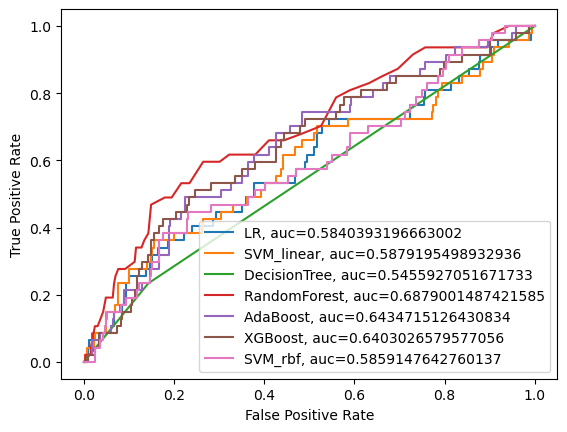

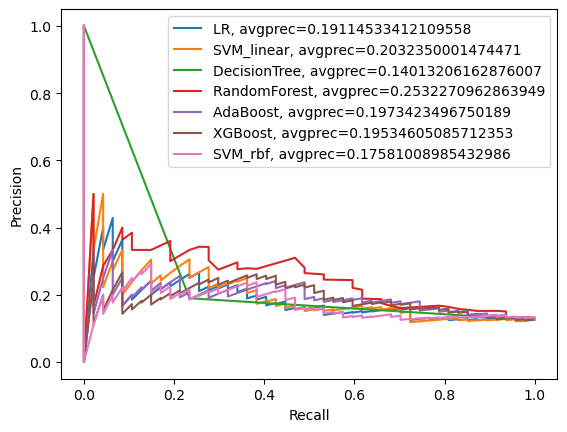

In [124]:
print(f'For Dataset 1:')
ViewResult(allXy[0], models)

For Dataset 2:
 Contingency Table for LR:
Pred   False  True 
Label              
False   1755    698
True      59    115
F1 Score: 0.23302938196555217

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   1756    697
True      57    117
F1 Score: 0.23684210526315788

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   2228    225
True     145     29
F1 Score: 0.1355140186915888

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   2417     36
True     162     12
F1 Score: 0.1081081081081081

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   2164    289
True     105     69
F1 Score: 0.2593984962406015

 Contingency Table for XGBoost:
Pred      0   1
Label          
False  2432  21
True    161  13
F1 Score: 0.125

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   2104    349
True     117     57
F1 Score: 0.196551724137931



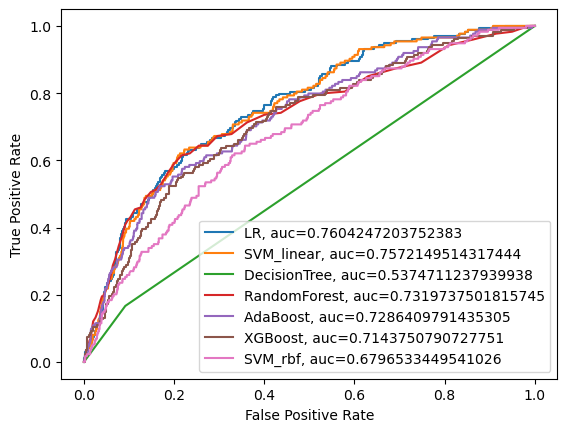

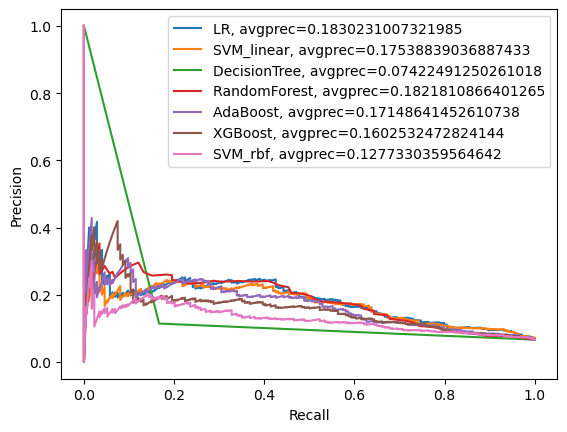

In [125]:
print(f'For Dataset 2:')
ViewResult(allXy[1], models)

For Dataset 3:
 Contingency Table for LR:
Pred   False  True 
Label              
False   6739   2085
True     117    245
F1 Score: 0.18202080237741455

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   6977   1847
True     130    232
F1 Score: 0.19008603031544447

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   8286    538
True     312     50
F1 Score: 0.10526315789473684

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   8788     36
True     347     15
F1 Score: 0.07263922518159806

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   8017    807
True     219    143
F1 Score: 0.21798780487804878

 Contingency Table for XGBoost:
Pred      0   1
Label          
False  8791  33
True    352  10
F1 Score: 0.04938271604938271

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   7860    964
True     240    122
F1 Score: 0.1685082872

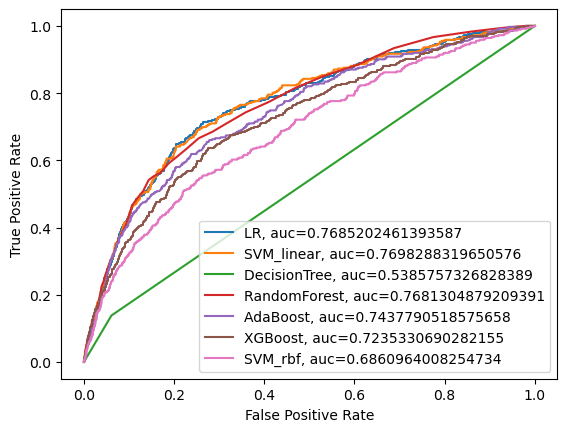

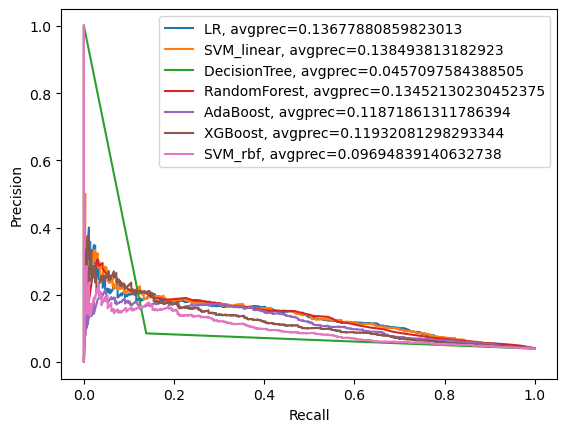

In [126]:
print(f'For Dataset 3:')
ViewResult(allXy[2], models)

In [15]:
#Function for GridSearchCV for Best Parameters

def GridSearchBP(mod, par, dat):
    rec = {}
    Xy_test = pd.concat([dat[2], dat[3]],axis=1)

    stratifiedCV = StratifiedKFold(n_splits=5)

    for model in mod:
        st = time.time()
        BestParams = GridSearchCV(
            mod[model],
            param_grid = par[model],
            scoring='f1',
            cv=stratifiedCV,
            n_jobs=-1
        )
        BestParams.fit(dat[0], dat[1])
        Xy_test[model] = BestParams.predict(dat[2])
        Xy_test[model+'_True'] = BestParams.predict_proba(dat[2])[:,1]
        rec[model] = BestParams
        et = time.time()
        print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))
        print(f'Parameters are {BestParams.best_params_}.')
        print(f'Runtime = {et-st}')
    return (rec, Xy_test)

In [31]:
#Larger 'steps' sizes are used for hyperparameters grid search which will be be further fine tuned again to save time.
models = {
    'LR':LR(),
    'SVM_linear':SVC(kernel='linear', probability=True),
    'DecisionTree':DTC(criterion='entropy'),
    'RandomForest':RFC(criterion='entropy'),
    'AdaBoost':ABC(),
    'XGBoost':XGBC(),
    'SVM_rbf':SVC(kernel='rbf', probability=True)
}
params = {
    'LR':{
        'C':np.arange(0.1,1,0.1)
    },
    'SVM_linear':{
        'C':[0.1,1,10,20]
    },
    'DecisionTree':{
        'max_depth':[1,10,50,100]
    },
    'RandomForest':{
        'n_estimators':[10,50,100],
        'max_depth':[2,10,50,100]
    },
    'AdaBoost':{
        'n_estimators':[10,50,100],
        'learning_rate':np.arange(0.1,1,0.1)
    },
    'XGBoost':{
        'n_estimators':[10,50,100],
        'max_depth':[2,4,8],
        'learning_rate':[0.1,1,10]
    },
    'SVM_rbf':{
        'C':[0.1,1,10,20]
    }
}

## Dataset 1
### To explore on the dataset with the most number of features

In [94]:
#Getting initial hyperparameters using all features of dataset 1.
#Dataset 1 is chosen due to the smaller sample size, and limited available time and processing power.

dat = df_list[0]

rec1, dfresult1 = GridSearchBP(models, params, dat)

For LR cross validation F1 score is 0.7417
Parameters are {'C': 0.4}.
Runtime = 3.0865795612335205
For SVM_linear cross validation F1 score is 0.7619
Parameters are {'C': 0.1}.
Runtime = 16.26215672492981
For DecisionTree cross validation F1 score is 0.8724
Parameters are {'max_depth': 100}.
Runtime = 0.17016935348510742
For RandomForest cross validation F1 score is 0.9622
Parameters are {'max_depth': 100, 'n_estimators': 100}.
Runtime = 2.989997386932373
For AdaBoost cross validation F1 score is 0.8614
Parameters are {'learning_rate': 0.6, 'n_estimators': 100}.
Runtime = 5.119503021240234
For XGBoost cross validation F1 score is 0.9323
Parameters are {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}.
Runtime = 2.93391489982605
For SVM_rbf cross validation F1 score is 0.9547
Parameters are {'C': 20}.
Runtime = 2.2351858615875244


 Contingency Table for LR:
Pred   False  True 
Label              
False    239     90
True      28     19
F1 Score: 0.2435897435897436

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    230     99
True      25     22
F1 Score: 0.26190476190476186

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    272     57
True      35     12
F1 Score: 0.20689655172413793

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    314     15
True      42      5
F1 Score: 0.1492537313432836

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    286     43
True      34     13
F1 Score: 0.2524271844660194

 Contingency Table for XGBoost:
Pred     0   1
Label         
False  308  21
True    42   5
F1 Score: 0.136986301369863

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    305     24
True      42      5
F1 Score: 0.13157894736842105



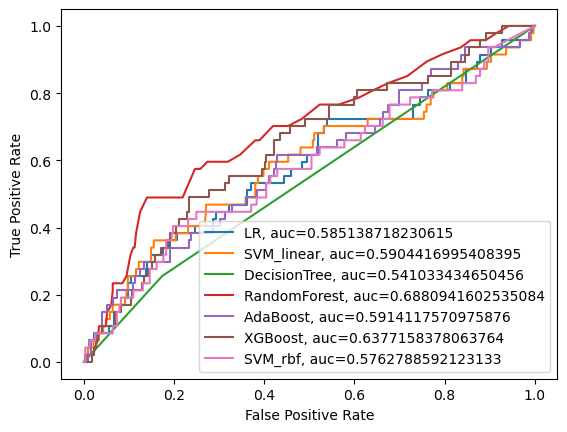

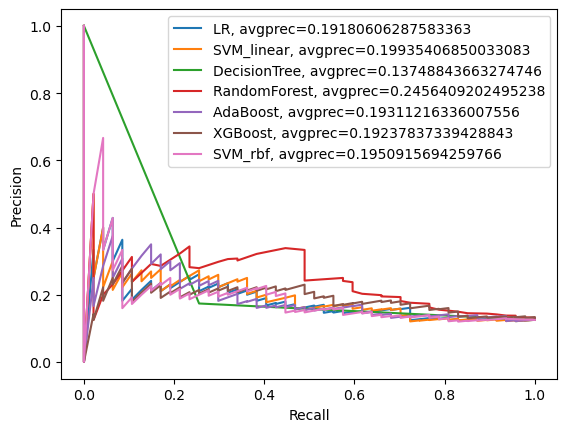

In [127]:
ViewResult(dfresult1, models)

In [97]:
# Hyperparameters for estimators of feature selection are set based on the results gathered from the initial hyperparameter tuning.
# The parameters are as per below:
models_2 = {
    'LR':LR(C=0.4),
    'SVM_linear':SVC(kernel='linear',C=0.1,probability=True),
    'DecisionTree':DTC(criterion='entropy',max_depth=100),
    'RandomForest':RFC(criterion='entropy',max_depth=100,n_estimators=100),
    'AdaBoost':ABC(learning_rate=0.6,n_estimators=100),
    'XGBoost':XGBC(learning_rate=0.1,max_depth=8,n_estimators=100),
    'SVM_rbf':SVC(kernel='rbf',C=20,probability=True)
    }

In [19]:
#Testing of feature selection with auto setting and best parameters from above.

data=df_list[0]
fsrec1={}

for model in models_2:
    feature_selection = SFS(
        models_2[model], n_features_to_select='auto', direction="forward", n_jobs=-1
    ).fit(data[0], data[1])
    
    fsrec1[model] = feature_selection
    print(model, feature_selection.n_features_to_select_, data[0].columns[feature_selection.support_])

LR 24 Index(['mbp_mean', 'sbp_max', 'dbp_max', 'dbp_mean', 'temperature_min',
       'temperature_max', 'temperature_mean', 'lactate_min', 'ph_min',
       'ph_max', 'calcium_min', 'calcium_max', 'glucose_max', 'creatinine_min',
       'hemoglobin_max', 'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min',
       'ast_max', 'sofa_respiration', 'sofa_cns',
       'charlson_comorbidity_index'],
      dtype='object')
SVM_linear 24 Index(['gender', 'mbp_min', 'dbp_min', 'temperature_mean', 'lactate_min',
       'lactate_max', 'calcium_min', 'calcium_max', 'glucose_min',
       'glucose_max', 'creatinine_min', 'creatinine_max', 'hemoglobin_min',
       'pt_min', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_min', 'sofa_respiration', 'sofa_cns',
       'sofa_renal'],
      dtype='object')
DecisionTree 24 Index(['gender', 'heart_rate_min', 'heart_rate_max', 'mbp_max', 'sbp_min',
       'sbp_mean', 'temperature_min', 'temperature_max', 'lactate_min',

In [16]:
#Creating a function for feature selection and fitting of best hyperparameters

def FeatureSelect_BestParams(models, models2, params, data, n_features):
    fsrec = {}
    bprec = {}
    dfresult = pd.concat([data[2],data[3]],axis=1)
    stratifiedCV = StratifiedKFold(n_splits=5)
    
    for model in models2:
        st = time.time()
        feature_selection = SFS(
            models2[model], n_features_to_select=n_features, direction="forward", n_jobs=-1
        ).fit(data[0], data[1])

        fsrec[model] = feature_selection
        print(model, feature_selection.n_features_to_select_, data[0].columns[feature_selection.support_])

        X = data[0].loc[:,list(data[0].columns[feature_selection.support_])]
        X_test = data[2].loc[:,list(data[0].columns[feature_selection.support_])]

        BestParams = GridSearchCV(
            models[model],
            param_grid = params[model],
            scoring='f1',
            n_jobs=-1
        )
        BestParams.fit(X,data[1])
        dfresult[model] = BestParams.predict(X_test)
        dfresult[model+'_True'] = BestParams.predict_proba(X_test)[:,1]
        bprec[model] = BestParams
        et = time.time()
        print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))
        print(f'Best parameters are {BestParams.best_params_}.')
        print(f'Runtime = {et-st}')
    return (fsrec, bprec, dfresult)

In [101]:
#Training and evaluating models with 10 features
data=df_list[0]

fs_rec1_10, bp_rec1_10, dfresult1_10 = FeatureSelect_BestParams(models, models_2, params, data, 10)

LR 10 Index(['sbp_max', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'calcium_min', 'sofa_respiration', 'sofa_cns',
       'charlson_comorbidity_index'],
      dtype='object')
For LR cross validation F1 score is 0.7280
Best parameters are {'C': 0.4}.
Runtime = 4.0770392417907715
SVM_linear 10 Index(['sbp_max', 'dbp_min', 'dbp_mean', 'temperature_mean', 'lactate_min',
       'pt_min', 'alt_max', 'ast_min', 'sofa_respiration', 'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.7309
Best parameters are {'C': 0.1}.
Runtime = 90.82286238670349
DecisionTree 10 Index(['gender', 'mbp_max', 'mbp_mean', 'ph_max', 'wbc_min', 'creatinine_min',
       'sofa_respiration', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.8932
Best parameters are {'max_depth': 100}.
Runtime = 4.547191858291626
RandomForest 10 Index(['gender', 'heart_rate_mean', 'ph_max', 'crea

 Contingency Table for LR:
Pred   False  True 
Label              
False    248     81
True      25     22
F1 Score: 0.2933333333333333

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    233     96
True      21     26
F1 Score: 0.30769230769230765

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    279     50
True      38      9
F1 Score: 0.169811320754717

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    317     12
True      43      4
F1 Score: 0.12698412698412698

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    293     36
True      38      9
F1 Score: 0.19565217391304346

 Contingency Table for XGBoost:
Pred     0   1
Label         
False  308  21
True    44   3
F1 Score: 0.08450704225352113

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    281     48
True      36     11
F1 Score: 0.20754716981132076



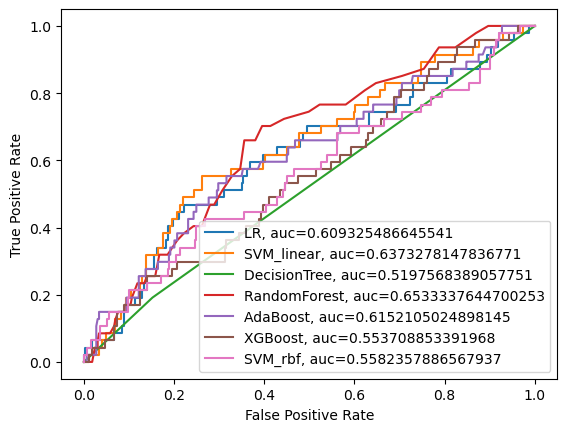

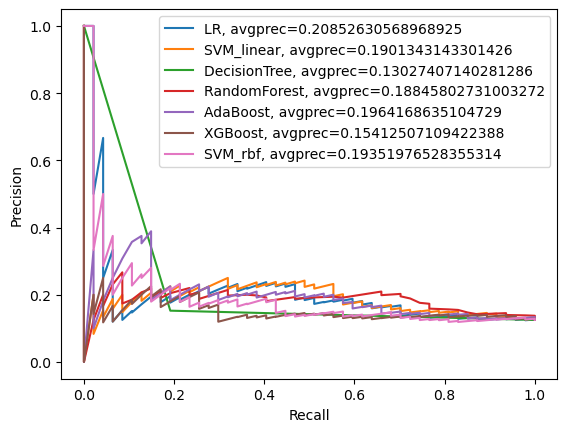

In [128]:
data=df_list[0]
ViewResult(dfresult1_10, models)

In [104]:
#Cross-validation f1 score of models is significantly higher than f1 score on test data. 
#There could be possible overfitting.
#Training and testing for 5 features instead to try reduce overfitting.

data=df_list[0]

fs_rec1_5, bp_rec1_5, dfresult1_5 = FeatureSelect_BestParams(models, models_2, params, data, 5)

LR 5 Index(['dbp_max', 'dbp_mean', 'temperature_min', 'sofa_cns',
       'charlson_comorbidity_index'],
      dtype='object')
For LR cross validation F1 score is 0.7068
Best parameters are {'C': 0.5}.
Runtime = 2.339324474334717
SVM_linear 5 Index(['dbp_min', 'temperature_mean', 'lactate_min', 'sofa_respiration',
       'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.7176
Best parameters are {'C': 20}.
Runtime = 59.01524066925049
DecisionTree 5 Index(['gender', 'ph_max', 'sofa_respiration', 'sofa_cardiovascular',
       'sofa_cns'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.8554
Best parameters are {'max_depth': 10}.
Runtime = 2.4422738552093506
RandomForest 5 Index(['gender', 'heart_rate_mean', 'ph_max', 'sofa_respiration', 'sofa_cns'], dtype='object')
For RandomForest cross validation F1 score is 0.8773
Best parameters are {'max_depth': 50, 'n_estimators': 100}.
Runtime = 83.46125721931458
AdaBoost 5 Index(['gender', 'lacta

 Contingency Table for LR:
Pred   False  True 
Label              
False    243     86
True      24     23
F1 Score: 0.2948717948717949

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    239     90
True      20     27
F1 Score: 0.3292682926829268

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    291     38
True      38      9
F1 Score: 0.19148936170212763

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    301     28
True      38      9
F1 Score: 0.21428571428571427

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    300     29
True      39      8
F1 Score: 0.19047619047619047

 Contingency Table for XGBoost:
Pred     0   1
Label         
False  309  20
True    42   5
F1 Score: 0.13888888888888892

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    258     71
True      29     18
F1 Score: 0.26470588235294124



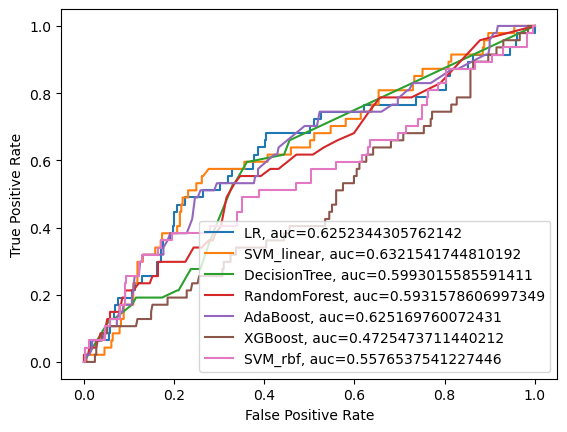

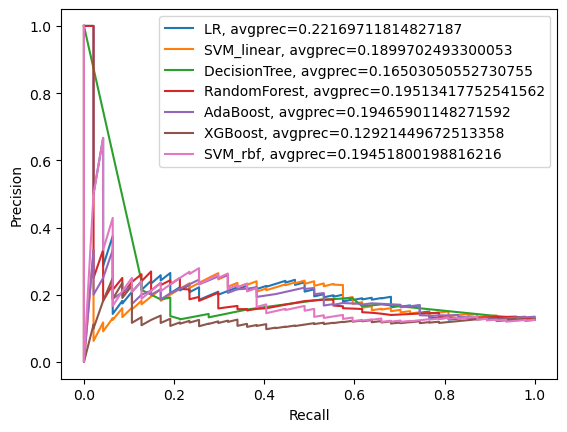

In [129]:
ViewResult(dfresult1_5, models)

In [107]:
data=df_list[0]

fs_rec1_15, bp_rec1_15, dfresult1_15 = FeatureSelect_BestParams(models, models_2, params, data, 15)

LR 15 Index(['sbp_max', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'ph_max', 'calcium_min',
       'glucose_max', 'pt_max', 'alp_max', 'sofa_respiration', 'sofa_cns',
       'charlson_comorbidity_index'],
      dtype='object')
For LR cross validation F1 score is 0.7540
Best parameters are {'C': 0.2}.
Runtime = 7.063947916030884
SVM_linear 15 Index(['mbp_min', 'sbp_max', 'dbp_min', 'dbp_mean', 'temperature_mean',
       'lactate_min', 'calcium_min', 'glucose_max', 'pt_min', 'alt_max',
       'alp_max', 'ast_min', 'ast_max', 'sofa_respiration', 'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.7360
Best parameters are {'C': 10}.
Runtime = 173.17635869979858
DecisionTree 15 Index(['gender', 'mbp_min', 'ph_max', 'glucose_max', 'wbc_min', 'wbc_max',
       'creatinine_min', 'hemoglobin_min', 'ast_max', 'bilirubin_total_max',
       'sofa_respiration', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns',
 

 Contingency Table for LR:
Pred   False  True 
Label              
False    250     79
True      27     20
F1 Score: 0.273972602739726

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    230     99
True      20     27
F1 Score: 0.3121387283236994

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    278     51
True      33     14
F1 Score: 0.25

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    307     22
True      39      8
F1 Score: 0.20779220779220778

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    290     39
True      35     12
F1 Score: 0.24489795918367344

 Contingency Table for XGBoost:
Pred     0   1
Label         
False  308  21
True    43   4
F1 Score: 0.11111111111111112

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    290     39
True      39      8
F1 Score: 0.1702127659574468



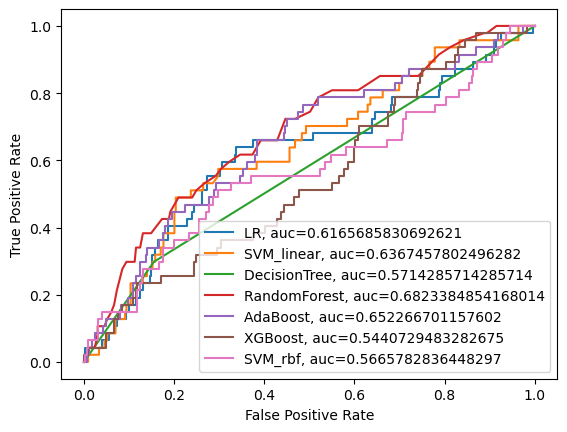

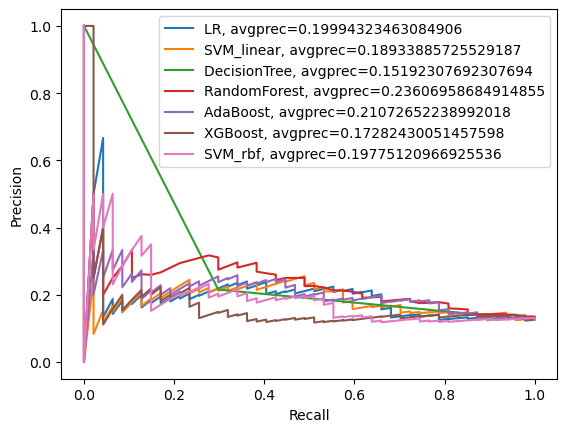

In [130]:
ViewResult(dfresult1_15, models)

## Dataset 3
### To explore on the dataset with the most data points

In [17]:
#Based on the testing on dataset 1, the overall top performer is the SVM linear model.
#Top performers for nonlinear models are Adaboost and SVM rbf.
#Thus, these 3 models are selected to be trained with dataset 3.

models_data3 = {
    'SVM_linear':SVC(kernel='linear', probability=True),
    'AdaBoost':ABC(),
    'SVM_rbf':SVC(kernel='rbf', probability=True)
}
params_data3 = {
    'SVM_linear':{
        'C':[0.1,1,10,20]
    },
    'AdaBoost':{
        'n_estimators':[10,50,100,200],
        'learning_rate':np.arange(0.1,1,0.1)
    },
    'SVM_rbf':{
        'C':[0.1,1,10,20]
    }
}

In [122]:
#Initial hyperparameter grid search for dataset 3

data3 = df_list[2]

rec3, dfresult3 = GridSearchBP(models_data3, params_data3, data3)

For SVM_linear cross validation F1 score is 0.6852
Parameters are {'C': 0.1}.
Runtime = 13064.474399805069
For AdaBoost cross validation F1 score is 0.9367
Parameters are {'learning_rate': 0.9, 'n_estimators': 200}.
Runtime = 233.16053986549377
For SVM_rbf cross validation F1 score is 0.9787
Parameters are {'C': 20}.
Runtime = 1894.0614566802979


 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   6978   1846
True     130    232
F1 Score: 0.1901639344262295

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   8488    336
True     286     76
F1 Score: 0.19638242894056845

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   8521    303
True     323     39
F1 Score: 0.11079545454545454



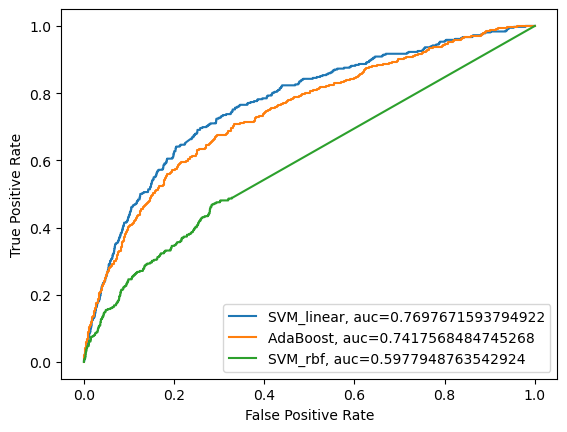

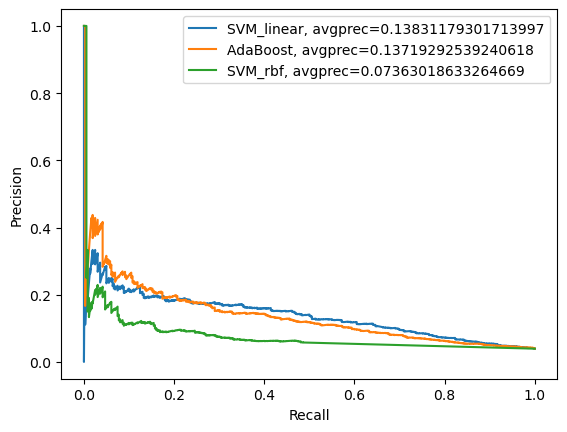

In [133]:
ViewResult(dfresult3, models_data3)

In [18]:
#Parameters used for estimators in feature selection.

models2_data3 = {
    'SVM_linear':SVC(kernel='linear', C=0.1, probability=True),
    'AdaBoost':ABC(learning_rate=0.9, n_estimators=200),
    'SVM_rbf':SVC(kernel='rbf', probability=True,C=20)
}

In [ ]:
# Taking forever to train one model, eg. 25405 sec for SVM linear model.

data3 = df_list[2]

fsrec3_5, bprec3_5, dfresult3_5 = FeatureSelect_BestParams(models_data3, models2_data3, params_data3, data3, 5)

SVM_linear 5 Index(['heart_rate_min', 'sbp_min', 'temperature_min', 'urineoutput',
       'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.6894
Best parameters are {'C': 1}.
Runtime = 25406.04796075821
AdaBoost 5 Index(['dbp_min', 'creatinine_min', 'sofa_coagulation', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')
For AdaBoost cross validation F1 score is 0.9422
Best parameters are {'learning_rate': 0.9, 'n_estimators': 200}.
Runtime = 518.5198705196381


In [ ]:
ViewResult(dfresult3_5, models_data3)

In [ ]:
data3 = df_list[2]

fsrec3_10, bprec3_10, dfresult3_10 = FeatureSelect_BestParams(models_data3, models2_data3, params_data3, data3, 10)

In [ ]:
ViewResult(dfresult3_10, models_data3)

In [ ]:
data3 = df_list[2]

fsrec3_15, bprec3_15, dfresult3_15 = FeatureSelect_BestParams(models_data3, models2_data3, params_data3, data3, 15)

In [ ]:
ViewResult(dfresult3_15, models_data3)